## Introduction

The purpose of this project is to explore insights from a company's delivery data. The data contains information on the company's orders, including the warehouses from where they were ordered, the order date, delivery date, customer code, and customer Zip codes. The analysis is primarily done using the Python pandas module.

The analysis aims to nswer the following questions;

- Which Zip code has the most orders?
- What was the ratio of one-time customers to returning customers?
- What is the distribution of order times? (When are customers likley to make orders?)
- What was the average delivery time for one-time customers versus returning customers?
- What was the average deliery time across Zip codes and in each month?
- Which warehouse had the most orders in each Zip code?
- Did orders increase or decrease each month across Zip codes?
- Which season had the fastest deliveries?
- Which warehouse had the fastest deliveries?

### Importing Relevant Libraries and the Dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Delivery_dataset.xlsx")
df.head()

,S/N,Warehouse,Order date,Delivery date,Customer,Zipcode
0,1,Butler,2021-01-03 13:44:00,2021-01-03 18:39:00,8240,15317
1,2,McKees Rocks,2021-01-04 06:26:00,2021-01-04 15:28:00,484,15102
2,3,Butler,2021-01-04 06:29:00,2021-01-04 19:29:00,13512,15301
3,4,Butler,2021-01-04 07:31:00,2021-01-04 15:59:00,11326,15228
4,5,Butler,2021-01-04 19:12:00,2021-02-04 16:10:00,13306,15301


In [3]:
df.tail()

,S/N,Warehouse,Order date,Delivery date,Customer,Zipcode
9475,9476,Pittsburgh Mills,9/30/2022 9:05,2022-03-10 17:45:00,220585,15106
9476,9477,Butler,9/30/2022 9:13,2022-05-10 17:13:00,17418,15209
9477,9478,Washington Big Box,9/30/2022 9:13,2022-03-10 18:14:00,270991,15216
9478,9479,Washington,9/30/2022 9:15,2022-03-10 18:32:00,270991,15216
9479,9480,Butler,9/30/2022 9:19,2022-04-10 16:09:00,100906,15237


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9480 entries, 0 to 9479
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S/N            9480 non-null   int64 
 1   Warehouse      9480 non-null   object
 2   Order date     9480 non-null   object
 3   Delivery date  9480 non-null   object
 4   Customer       9480 non-null   object
 5   Zipcode        9480 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 444.5+ KB


## Data Cleaning

### Data Types

Checking if the columns have consistent data types

In [5]:
for column in df.columns:
    
    unique_data_types = df[column].apply(type).unique()
    
    if len(unique_data_types) > 1:
        print(f"Column '{column}' has more than one type of data.")
        print("Unique data types:", unique_data_types)
    else:
        print(f"Column '{column}' has the same data type:", unique_data_types[0])

Column 'S/N' has the same data type: <class 'int'>
Column 'Warehouse' has the same data type: <class 'str'>
Column 'Order date' has more than one type of data.
Unique data types: [<class 'datetime.datetime'> <class 'str'>]
Column 'Delivery date' has more than one type of data.
Unique data types: [<class 'datetime.datetime'> <class 'str'>]
Column 'Customer' has more than one type of data.
Unique data types: [<class 'int'> <class 'str'>]
Column 'Zipcode' has the same data type: <class 'int'>


#### Findings

The S/N (serial number), Warehouse, and Zip Code columns have the same data types.

The Order date, Delivery Date, and Customer columns have more than one datatypes; hence, need cleaning.

In the following cells, I will make the following changes;

- Order date changed to consistently be datetime datatype
- Delivery date changed to consistently be datetime datatype
- Customer data type changed to be an int data type
- Zip code also changed to a string

In [6]:
#Order date and delivery date changes

df['Order date'] = pd.to_datetime(df['Order date'])
df['Delivery date'] = pd.to_datetime(df['Delivery date'])
df['Customer'] = df['Customer'].astype(str)
df['Zipcode'] = df['Zipcode'].astype(str)


In [7]:
#rerunning this to confirm changes

for column in df.columns:
    
    unique_data_types = df[column].apply(type).unique()
    
    if len(unique_data_types) > 1:
        print(f"Column '{column}' has more than one type of data.")
        print("Unique data types:", unique_data_types)
    else:
        print(f"Column '{column}' has the same data type:", unique_data_types[0])

Column 'S/N' has the same data type: <class 'int'>
Column 'Warehouse' has the same data type: <class 'str'>
Column 'Order date' has the same data type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column 'Delivery date' has the same data type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column 'Customer' has the same data type: <class 'str'>
Column 'Zipcode' has the same data type: <class 'str'>


### Missing Data

The following code shows that none of the columns has missing data

In [8]:
print(df.isnull().sum())

S/N              0
Warehouse        0
Order date       0
Delivery date    0
Customer         0
Zipcode          0
dtype: int64


### Duplicates

Checking for possible duplicated data in the dataset

In [9]:
duplicated_data = df.duplicated()

num_duplicated = duplicated_data.sum()

print(num_duplicated)

0


There are no complete duplicates, but there is a possibility of half duplicates. If the Order date, Delivery date, and Customer code are exactly the same, then there is a likelihood that the data is duplicated. Thus, the following code checks for duplicated data with a subset of these three columns.

In [10]:
half_duplicates = df.duplicated(subset=['Order date', 'Delivery date', 'Customer'], keep=False)
print(half_duplicates.sum())

264


In [11]:
duplicates_df = df[half_duplicates]

duplicates_df

,S/N,Warehouse,Order date,Delivery date,Customer,Zipcode
14,15,Washington,2021-01-06 21:35:00,2021-02-06 16:44:00,2956,15241
15,16,McKees Rocks,2021-01-06 21:35:00,2021-02-06 16:44:00,2956,15241
58,59,Butler,2021-01-12 14:06:00,2021-03-12 15:57:00,11396,15220
59,60,Beaver,2021-01-12 14:06:00,2021-03-12 15:57:00,11396,15220
82,83,McKees Rocks,2021-02-08 13:12:00,2021-03-08 16:57:00,16332,15317
...,...,...,...,...,...,...
9169,9170,Washington,2021-09-23 20:01:00,2021-09-29 16:35:00,7679,15044
9320,9321,Pittsburgh Mills,2022-09-27 08:48:00,2022-09-29 10:13:00,119778,15214
9321,9322,Washington,2022-09-27 08:48:00,2022-09-29 10:13:00,119778,15214
9442,9443,Beaver,2021-09-30 18:12:00,2021-04-10 14:14:00,11132,15220


Based on the above data of duplicates, there is a likelihood that the duplicated data represents the same orders recorded in different warehouses. Since this analysis focuses on each customer order, I will drop the duplicates.

In [12]:
#dropping duplicates and checking if change is successful

df.drop_duplicates(subset=['Order date', 'Delivery date', 'Customer'], inplace=True)

half_duplicates = df.duplicated(subset=['Order date', 'Delivery date', 'Customer'])
print(half_duplicates.sum())

0


## Data Analysis

### Zip Code with the most Orders

In [13]:
df['Zipcode'].unique()

array(['15317', '15102', '15301', '15228', '15218', '15044', '15236',
       '15017', '15241', '15367', '15216', '15220', '15237', '15221',
       '15227', '15222', '15057', '15106', '15129', '15206', '15205',
       '15211', '15233', '15212', '15235', '15213', '15090', '15226',
       '15120', '15234', '15207', '15243', '15210', '15055', '15201',
       '15217', '15224', '15203', '15321', '15143', '15209', '15223',
       '15144', '15232', '15007', '44223', '15112', '15202', '15208',
       '15332', '15214', '15342', '15084', '16001', '15136', '15010',
       '44485', '44512', '44320', '15238', '44321', '15101', '16066',
       '15116', '15219', '15147', '15204', '44442', '15122', '15146',
       '44312', '44515', '44484', '15071', '15330', '15031', '15108',
       '44514', '15239', '15215', '16046', '15229', '29680', '44505',
       '16002', '44420', '15068', '44511', '16101', '15145', '15063',
       '26501', '15035', '44509', '44266', '44446', '44471'], dtype=object)

In [14]:
zip_counts = df['Zipcode'].value_counts()

print(zip_counts)

15241    895
15317    805
15237    551
15220    501
15102    420
        ... 
15031      1
44505      1
29680      1
44320      1
44471      1
Name: Zipcode, Length: 97, dtype: int64


The Zip code with the most orders is 15241 with 895 orders. It is followed closely by 15317 with 805 orders and the third is 15237 with 551 orders. 

### Ratio of one-time customers to returning customers

In [21]:
customerorders = df['Customer'].value_counts()

one_time_customers = sum(customerorders == 1)
repeat_customers = sum(customerorders > 1)

print("The ratio of one time customers to returning customers is", one_time_customers, "to", repeat_customers)

The ratio of one time customers to returning customers is 794 to 957


### What is the distribution of order times? (When are customers likley to make orders?)

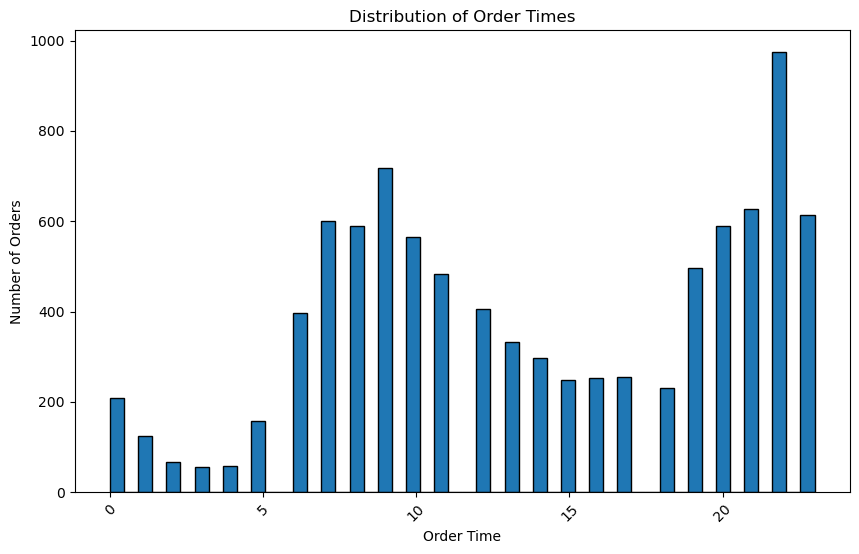

In [26]:
df['Order Hour'] = df['Order date'].dt.hour

plt.figure(figsize=(10, 6))
plt.hist(df['Order Hour'], bins=50, edgecolor='black')
plt.title('Distribution of Order Times')
plt.xlabel('Order Time')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Based on this chart, Orders are highest at 11:00 p.m. However, the orders are lowest after midnight to 06:00 a.m. The orders then increase significantly in the morning to middday and the decline in the afternoon. The customers orders start to increase again after 7:00 p.m.

### What was the average delivery time for one-time customers versus returning customers?

In [28]:
df['delivery time'] = df['Delivery date'] - df['Order date'] 

df.head()


,S/N,Warehouse,Order date,Delivery date,Customer,Zipcode,Order Hour,delivery time
0,1,Butler,2021-01-03 13:44:00,2021-01-03 18:39:00,8240,15317,13,0 days 04:55:00
1,2,McKees Rocks,2021-01-04 06:26:00,2021-01-04 15:28:00,484,15102,6,0 days 09:02:00
2,3,Butler,2021-01-04 06:29:00,2021-01-04 19:29:00,13512,15301,6,0 days 13:00:00
3,4,Butler,2021-01-04 07:31:00,2021-01-04 15:59:00,11326,15228,7,0 days 08:28:00
4,5,Butler,2021-01-04 19:12:00,2021-02-04 16:10:00,13306,15301,19,30 days 20:58:00


### What was the average deliery time across Zip codes and in each month?

### Which warehouse had the most orders in each Zip code?

### Did orders increase or decrease each month across Zip codes?

### Which season had the fastest deliveries?

### Which warehouse had the fastest deliveries?